# Trajectories in Spatially Varying Fields

This notebook illustrates a method for computing trajectories in spatially varying electric and magnetic fields.

We define the electric and magnetic fields as functions of spatial coordinates, then call these functions when updating positions and velocities.

The field functions can be mathematical functions, they can return constant values, they can look up elements of arrays, etc.  The only requirement is that they are passed three coordinate values and they return three components of the field.

In [1]:
# Get access to useful functions.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Define functions to give electric and magnetic fields
# as functions of position.

def electric_field(x,y,z):
    """
    Return components of the electric field at location (x,y,z).
    """
    Ex = 0.0
    Ey = 0.0
    Ez = 0.1
    
    return Ex, Ey, Ez

def magnetic_field(x,y,z):
    """
    Return components of the magnetic field at location (x,y,z).
    """
    Bx = 0
    By = 1-y**2
    Bz = z**2
    
    return Bx, By, Bz

In [3]:
# Define the derivative function.
def dy_dt(y, t, e_func, b_func):
    """
    y = [x, y, z, vx, vy, vz]
    t = time
    e_func = E(x,y,z) --- function that returns electric field
    b_func = B(x,y,z) --- function that returns magnetic field
    
    This function returns dy/dt based on the Lorentz force law:
    F = E(x,y,z) + v x B(x,y,z).
    """
    
    # Evaluate electric and magnetic fields.
    E = e_func(y[0], y[1], y[2])
    B = b_func(y[0], y[1], y[2])
    
    # Array for return values
    dy = np.zeros(6)
    
    # Position derivatives
    dy[0] = y[3]
    dy[1] = y[4]
    dy[2] = y[5]
    
    # Velocity derivatives: Newton's Second Law
    dy[3] = E[0] + (y[4]*B[2] - y[5]*B[1])
    dy[4] = E[1] + (y[5]*B[0] - y[3]*B[2])
    dy[5] = E[2] + (y[3]*B[1] - y[4]*B[0])
    
    # Return the derivative array.
    return dy

In [4]:
# Define array of time values to study.
num_points = 10001
tMax = 20
t = np.linspace(0, tMax, num_points)

# Define the initial conditions.
X0 = 0
Y0 = 0
Z0 = 0.1

VX0 = 0.2
VY0 = 0
VZ0 = 0.1

y0 = np.array([X0, Y0, Z0, VX0, VY0, VZ0])

# Integrate the equations of motion.
trajectory = odeint(dy_dt, y0, t, args=(electric_field, magnetic_field))
x, y, z, vx, vy, vz = trajectory.transpose()

(-2.476, 1.875, -0.1998, 4.151)

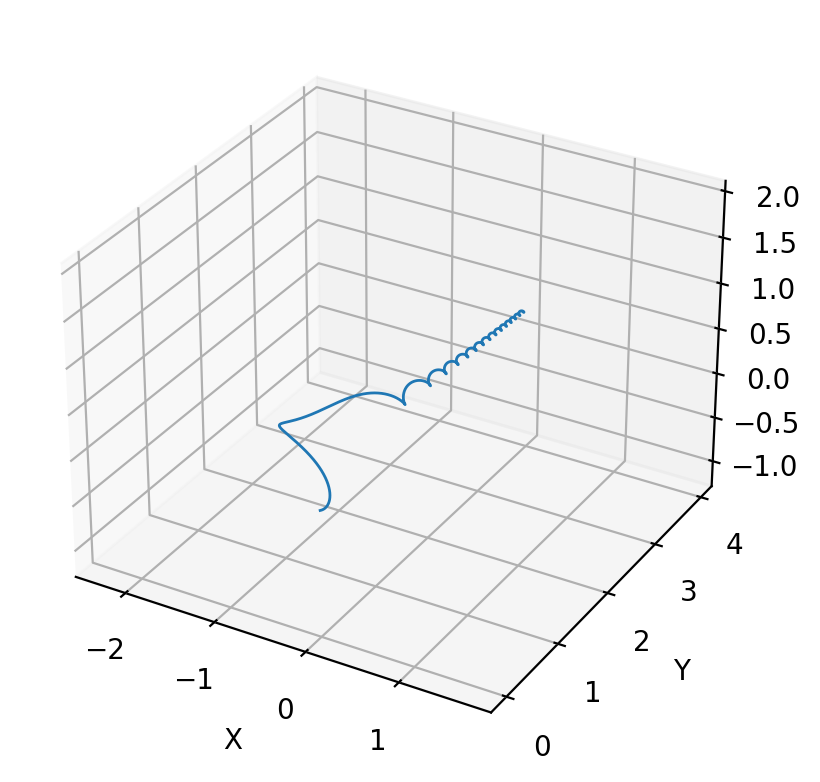

In [5]:
# Plot the result.
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.plot(x,y,z, linewidth=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.axis("equal")